In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [59]:
df.describe(include='all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


In [60]:
df['NObeyesdad'].value_counts()

# Obesity_Type_I      
# Obesity_Type_III    
# Obesity_Type_II   
# Overweight_Level_I  
# Overweight_Level_II 
# Normal_Weight      
# Insufficient_Weight   

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [61]:
weight_mapping = {
    'Obesity_Type_I': 4,
    'Obesity_Type_III': 6,
    'Obesity_Type_II': 5,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Normal_Weight': 1,
    'Insufficient_Weight': 0
}
transport_mapping = {
    'Public_Transportation': 0,
    'Automobile': 1,
    'Walking': 2,
    'Motorbike': 3,
    'Bike': 4
}
calc_mapping = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}
binary_mapping = {
    'no': 0,
    'yes': 1
}
gender_mapping = {
    'Female': 0,
    'Male': 1
}
# Apply the mapping to the 'Weight_Status' column
df['NObeyesdad'] = df['NObeyesdad'].map(weight_mapping)
df['MTRANS'] = df['MTRANS'].map(transport_mapping)
df['CALC'] = df['CALC'].map(calc_mapping)
df['CAEC'] = df['CAEC'].map(calc_mapping)
df['SCC'] = df['SCC'].map(binary_mapping)
df['SMOKE'] = df['SMOKE'].map(binary_mapping)
df['FAVC'] = df['FAVC'].map(binary_mapping)
df['family_history_with_overweight'] = df['family_history_with_overweight'].map(binary_mapping)
df['Gender'] = df['Gender'].map(gender_mapping)

In [62]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,0,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,0,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,0,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,2,2
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0,6
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0,6
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0,6
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0,6


In [31]:
# correlation analysis
corrMatrix = df.corr()
corrMatrix.style.background_gradient(cmap='Blues')

ValueError: could not convert string to float: 'Female'

C:\Users\Admin\AppData\Local\Temp\ipykernel_21872\1635076732.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weight_Status', data=df, palette='Set2')


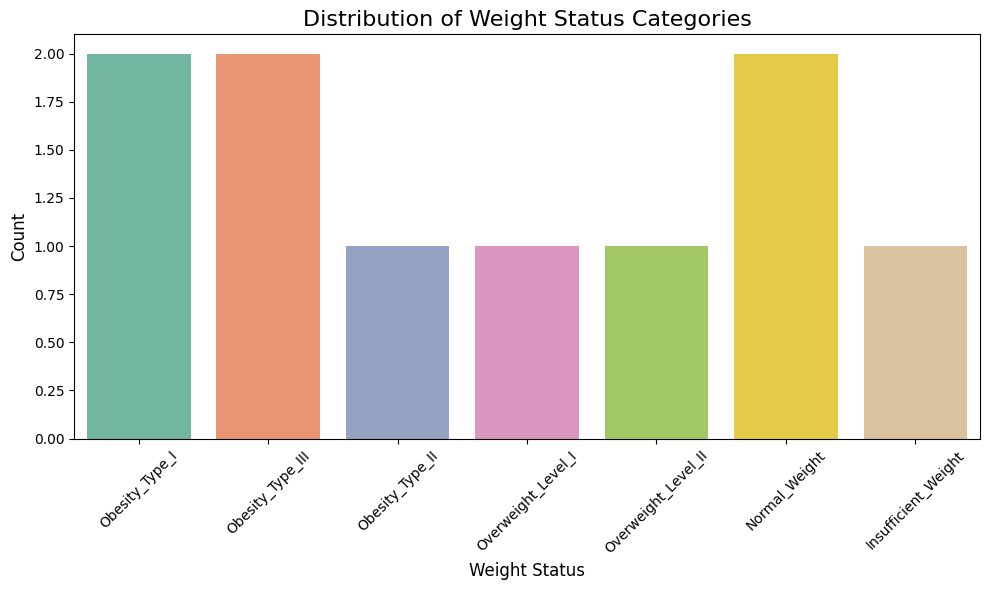

In [66]:

# Sample data
data = {'Weight_Status': ['Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_II', 
                          'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight', 
                          'Obesity_Type_III', 'Normal_Weight', 'Obesity_Type_I']}

df = pd.DataFrame(data)

# Create a count plot (bar plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='Weight_Status', data=df, palette='Set2')

# Adding labels and title
plt.title('Distribution of Weight Status Categories', fontsize=16)
plt.xlabel('Weight Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()
plt.show()


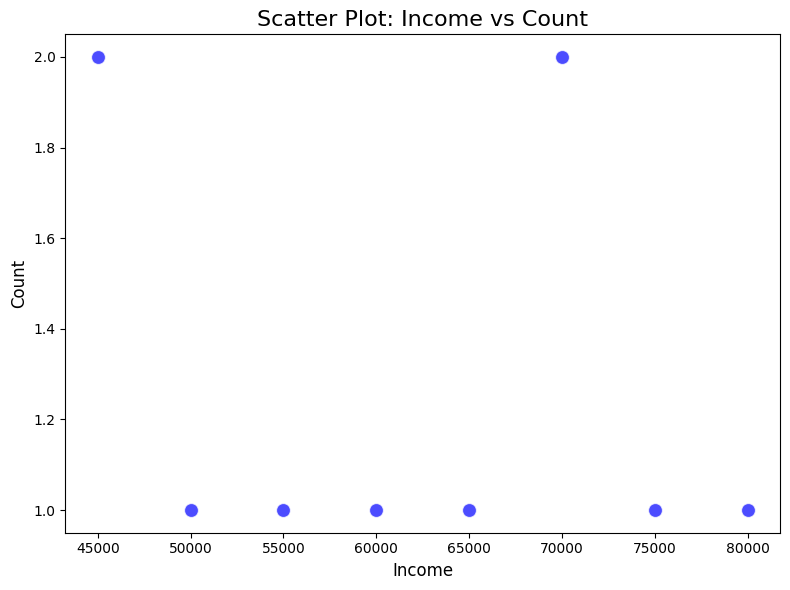

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace with your actual dataset)
df = pd.DataFrame({
    'Income': [50000, 60000, 45000, 70000, 80000, 55000, 65000, 45000, 70000, 75000]
})

# Get the count of each unique income value
income_counts = df['Income'].value_counts().reset_index()
income_counts.columns = ['Income', 'Count']

# Scatter plot of Income vs Count
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Count', data=income_counts, color='blue', s=100, alpha=0.7)

# Adding titles and labels
plt.title('Scatter Plot: Income vs Count', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
